<a href="https://colab.research.google.com/github/maushamkumar/Data-Analysis/blob/main/Taxi_Cav_Driver_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximizing Revenue for Taxi Cav Drivers through Payment Type Analysis
## Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount

# Objective
This project's main foal is to run an A/B test to examine the relationship between the total fare and method of payment. we use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards those who pay with cash.

# Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries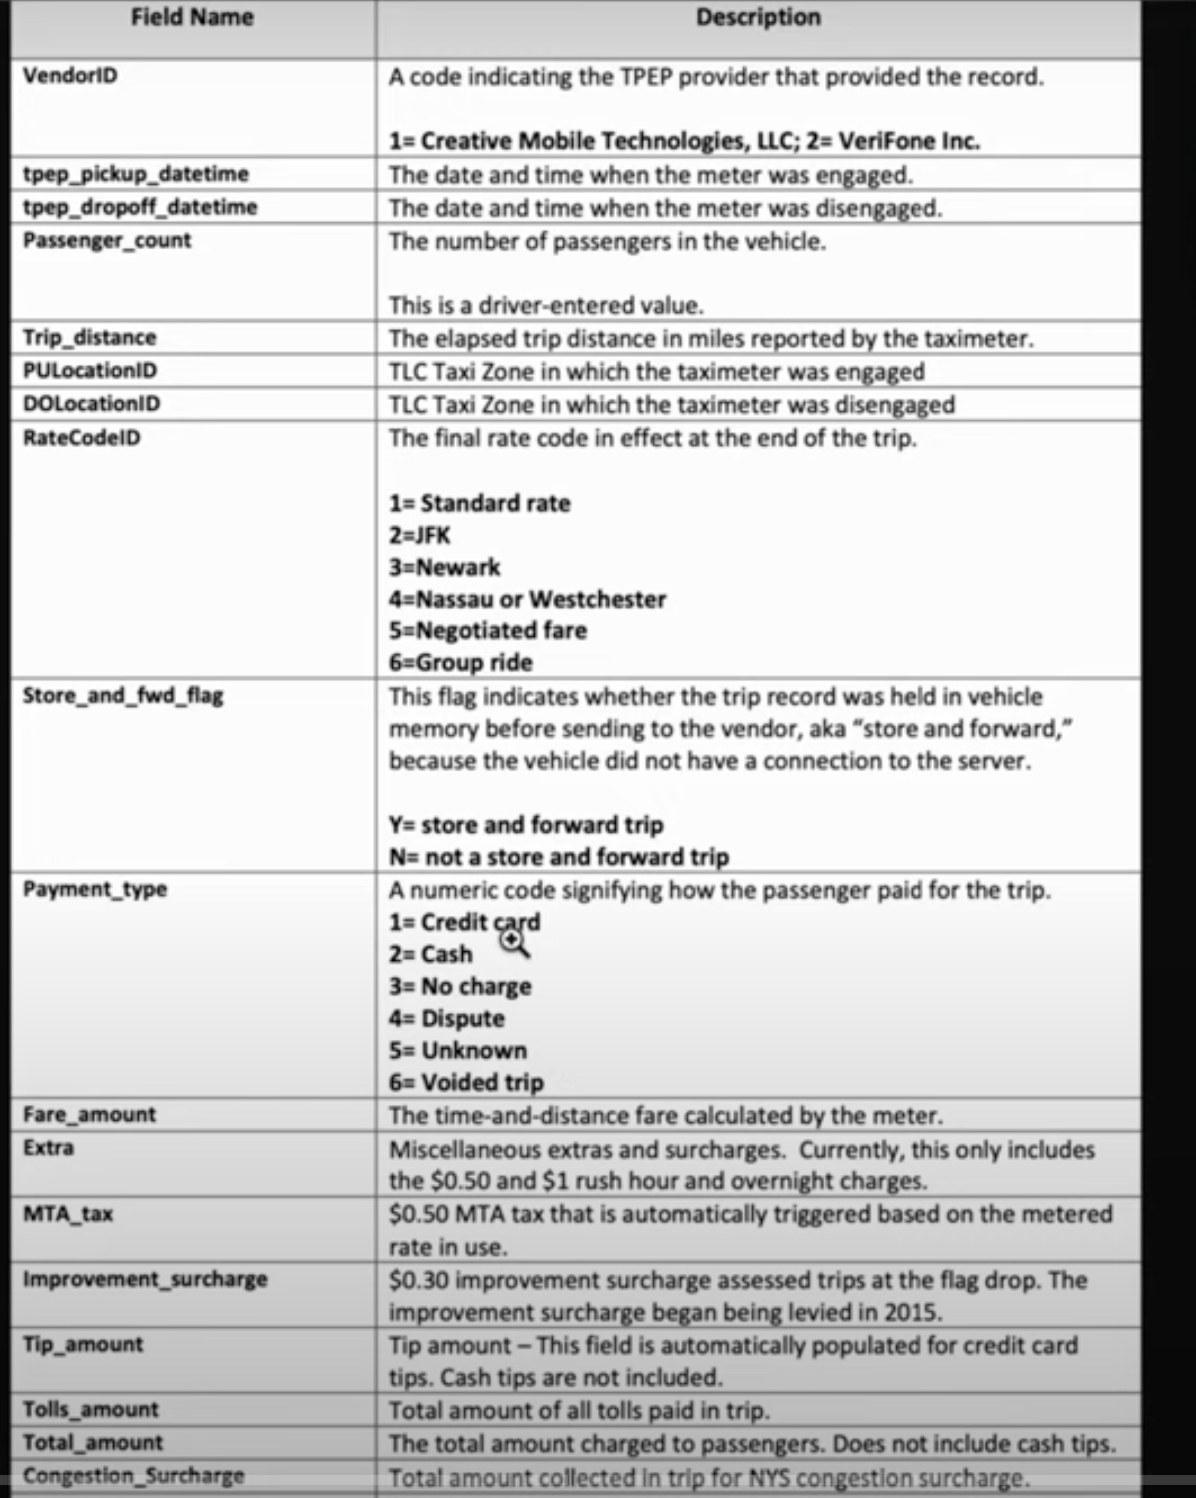

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://query.data.world/s/iewnhqlesh4ssr6ambor37vmbrclsm?dws=00000")

<ipython-input-75-19eb625b11a8>:1: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In payment_type
* 1 - Represent (Credit card)
* 2 - Represent (Cash)
* 3 - No charge
* 4 - Dispute
* 5 - Unknown
* 6 - Voided trip

# Exokiratirt Data Anakysis

In [ ]:
df.shape

(6405008, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df['duration'] = (abs(df['tpep_pickup_datetime'] - df['tpep_dropoff_datetime']))


In [ ]:
df['duration'] = (df['duration'].dt.total_seconds()/60).round(2) # This will convert the time into minutes

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.80
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.42
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.18
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.85
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.00
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.00
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.83
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.65


In [ ]:
# Creating a new DataFrame with specific columns (initially empty)
data = df[['passenger_count', 'payment_type', 'trip_distance', 'fare_amount', 'duration']]


In [ ]:
data.head()

,passenger_count,payment_type,trip_distance,fare_amount,duration
0,1.0,1.0,1.2,6.0,4.80
1,1.0,1.0,1.2,7.0,7.42
2,1.0,1.0,0.6,6.0,6.18
3,1.0,1.0,0.8,5.5,4.85
4,1.0,2.0,0.0,3.5,2.30


In [ ]:
data.isnull().sum()

passenger_count    0
payment_type       0
trip_distance      0
fare_amount        0
duration           0
dtype: int64

In [ ]:
data.shape

(6339567, 5)

In [ ]:
(65441/len(df)) * 100

1.021716132126611

In [ ]:
data.dropna(inplace=True)

<ipython-input-87-f1116dacf2bb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['passenger_count'] = data['passenger_count'].astype(int)
data['payment_type'] = data['payment_type'].astype(int)

<ipython-input-93-568a8648c5dc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-93-568a8648c5dc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.drop_duplicates()

,passenger_count,payment_type,trip_distance,fare_amount,duration
0,1,1,1.20,6.0,4.80
1,1,1,1.20,7.0,7.42
2,1,1,0.60,6.0,6.18
3,1,1,0.80,5.5,4.85
4,1,2,0.00,3.5,2.30
...,...,...,...,...,...
6339555,3,1,2.09,10.0,14.80
6339561,1,1,4.11,17.5,21.50
6339563,1,1,2.13,13.0,19.00
6339564,1,1,2.55,12.5,16.28


In [ ]:
data.drop_duplicates(inplace=True)

<ipython-input-95-515f69ef7765>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.shape

(3007861, 5)

In [ ]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.717277
2    0.149288
3    0.039472
5    0.035601
6    0.020846
4    0.019476
0    0.018030
7    0.000005
9    0.000003
8    0.000003
Name: proportion, dtype: float64

<Axes: xlabel='passenger_count'>

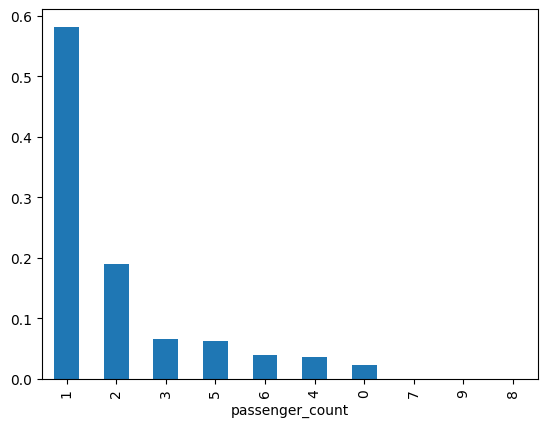

In [ ]:
data['passenger_count'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
data['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [ ]:
data = data[data['payment_type'] < 3]
data = data[(data['passenger_count'] > 0)&(data['passenger_count']<6)]

In [ ]:
data.shape

(2780283, 5)

In [ ]:
data['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace=True)

In [ ]:
data.sample(10)

,passenger_count,payment_type,trip_distance,fare_amount,duration
5596388,2,Card,0.93,6.0,6.60
552295,1,Cash,1.72,13.5,20.30
5006765,2,Card,10.23,30.0,21.57
2030879,4,Cash,4.19,31.5,45.67
2344029,1,Card,1.77,11.5,16.12
3350973,2,Card,3.11,13.5,16.32
4162259,5,Cash,0.53,4.5,3.70
6261377,1,Cash,1.97,9.5,10.10
4953070,1,Card,3.90,17.0,23.95
1748350,1,Card,1.30,10.5,14.92


In [ ]:
data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,1.780567e+01,2.415677e+01
std,1.176652e+00,4.895890e+00,1.506997e+01,9.259980e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,0.000000e+00
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.880000e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573000e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.337000e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525120e+03


In [ ]:
data = data[data['fare_amount'] > 0]
data = data[data['trip_distance'] > 0]
data = data[data['duration'] > 0]

In [ ]:
data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.748933e+06,2.748933e+06,2.748933e+06,2.748933e+06
mean,1.738151e+00,4.583312e+00,1.766835e+01,2.418361e+01
std,1.179440e+00,4.897805e+00,1.447531e+01,9.273762e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,2.000000e-02
25%,1.000000e+00,1.530000e+00,9.000000e+00,9.950000e+00
50%,1.000000e+00,2.770000e+00,1.300000e+01,1.575000e+01
75%,2.000000e+00,5.500000e+00,2.100000e+01,2.333000e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525120e+03


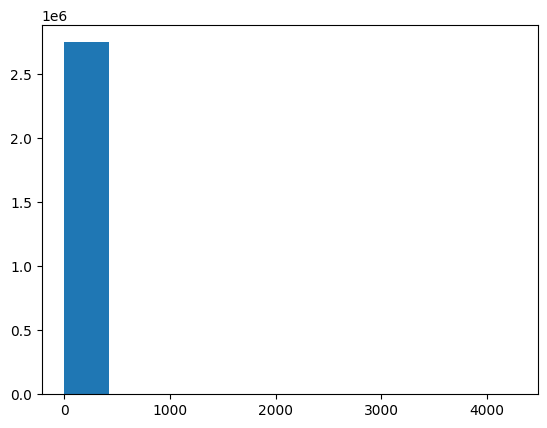

In [ ]:
plt.hist('fare_amount', data=data)
plt.show()

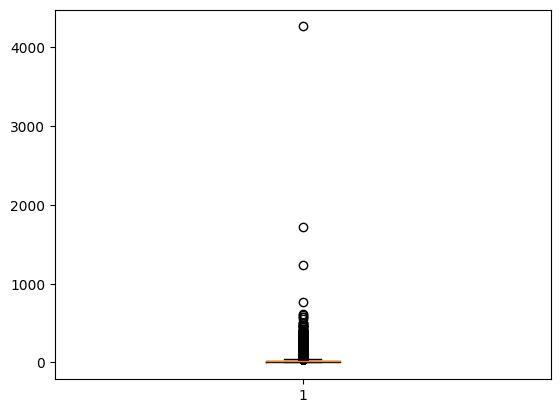

In [ ]:
plt.boxplot('fare_amount', data=data)
plt.show()

In [ ]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound
                 ) & (data[col] <= upper_bound)]

In [ ]:
data.head()

,passenger_count,payment_type,trip_distance,fare_amount,duration
0,1,Card,1.20,6.0,4.80
1,1,Card,1.20,7.0,7.42
2,1,Card,0.60,6.0,6.18
3,1,Card,0.80,5.5,4.85
5,1,Cash,0.03,2.5,0.88


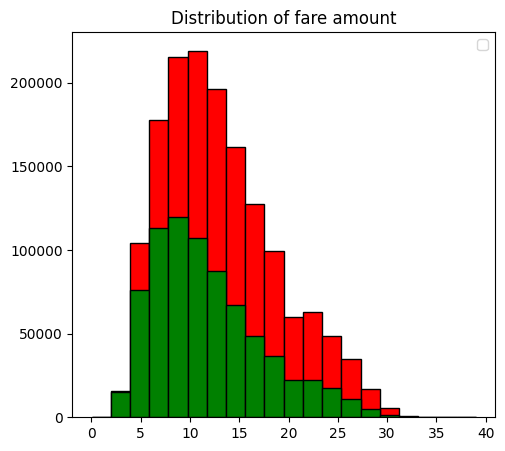

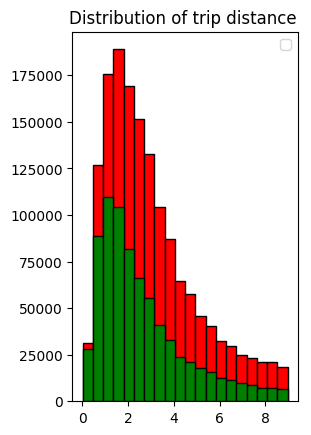

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1 )
plt.title('Distribution of fare amount')
plt.hist(data[data['payment_type'] == 'Card']['fare_amount'], histtype='barstacked', bins = 20 , edgecolor = 'black', color = 'red')
plt.hist(data[data['payment_type'] == 'Cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor = 'black', color='green')
plt.legend()
plt.show()

plt.subplot(1, 2, 2 )
plt.title('Distribution of trip distance ')
plt.hist(data[data['payment_type'] == 'Card']['trip_distance'], histtype='barstacked', bins = 20 , edgecolor = 'black', color = 'red')
plt.hist(data[data['payment_type'] == 'Cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor = 'black', color='green')
plt.legend()
plt.show()

In [ ]:
data.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.111787  5.848618      2.992088  1.992633
Cash           11.757439  5.612380      2.602071  1.913590

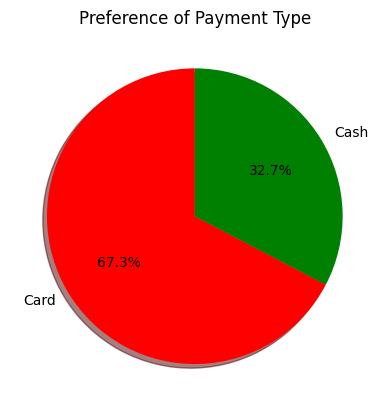

In [ ]:
plt.title('Preference of Payment Type')
plt.pie(data['payment_type'].value_counts(normalize=True),
        labels=data['payment_type'].value_counts().index,
        startangle=90,
        shadow=True,
        autopct='%1.1f%%',  # Corrected the format string
        colors=['red', 'green', 'blue'])  # Added a color for 'Other'
plt.show()

In [ ]:
passenger_count = data.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

In [ ]:
passenger_count.rename(columns={'passenger_count': 'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

In [ ]:
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100

In [ ]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909176,39.567393
1,Card,2,327657,14.259652
2,Card,3,122405,5.327073
3,Card,4,63675,2.771140
4,Card,5,124039,5.398185
5,Cash,1,460530,20.042293
6,Cash,2,155466,6.765889
7,Cash,3,54505,2.372061
8,Cash,4,32714,1.423715
9,Cash,5,47624,2.072599


In [ ]:
empty_data = pd.DataFrame(columns=[1, 2, 3, 4, 5])

# Adding the payment_type column
empty_data['payment_type'] = ['Card', 'Cash']

# Assigning values from passenger_count
# Assuming we want to fill columns 1 to 5 with specific values
empty_data.iloc[0, 0:5] = passenger_count.iloc[0:5, -1].values
empty_data.iloc[1, :5] = passenger_count.iloc[5:10,-1 ].values

empty_data

,1,2,3,4,5,payment_type
0,39.567393,14.259652,5.327073,2.77114,5.398185,Card
1,20.042293,6.765889,2.372061,1.423715,2.072599,Cash


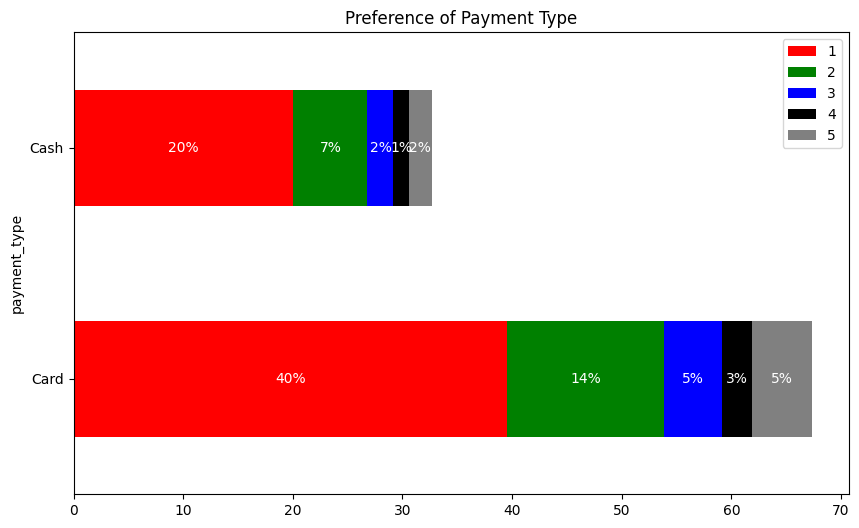

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = empty_data.plot(x='payment_type', kind='barh', stacked=True,
                       color=['red', 'green', 'blue', 'black', 'grey'], ax=ax)

# Add percentage text
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        height = bar.get_height()
        x, y = bar.get_xy()
        ax.text(x + width / 2,
                y + height / 2,
                '{:.0f}%'.format(width),
                horizontalalignment='center',
                verticalalignment='center',
                color='white')

plt.title('Preference of Payment Type')
plt.show()

**Null hypothesis** There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis** There is a difference in average fare between customers who use credit cards and customers who use cash.

Sample 1 who prefer card
Sample 2 who prefer cash

we have two independent samples which we have to compare

Fare amount is continuous amount (chi-square x) (ANOVA - when have more than two groups) so, we'll apply a t-test.

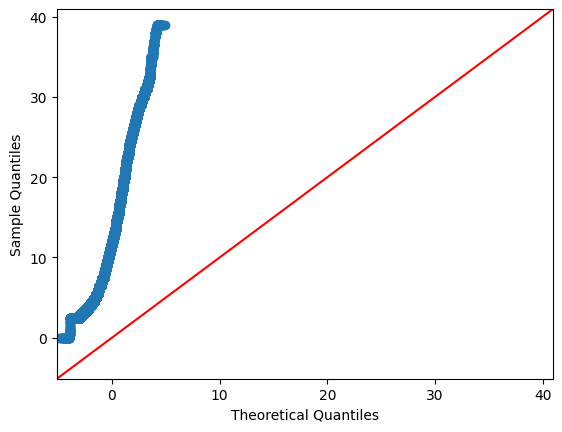

In [ ]:
sm.qqplot(data['fare_amount'], line='45')
plt.show()

In [ ]:
card_sample = data[data['payment_type'] == 'Card']
cash_sample = data[data['payment_type'] == 'Cash']

In [ ]:
t_stats, p_value = st.ttest_ind(card_sample['fare_amount'], cash_sample['fare_amount'])

In [ ]:
t_stats, p_value

(166.81072621685215, 0.0)

In [ ]:
# P_value > 0 => Reject Null Hypothesis

In [ ]:
data.head()

,passenger_count,payment_type,trip_distance,fare_amount,duration
0,1,Card,1.20,6.0,4.80
1,1,Card,1.20,7.0,7.42
2,1,Card,0.60,6.0,6.18
3,1,Card,0.80,5.5,4.85
5,1,Cash,0.03,2.5,0.88


In [ ]:
r

In [ ]:
data['payment_type']

0          Card
1          Card
2          Card
3          Card
5          Cash
           ... 
6339550    Card
6339555    Card
6339561    Card
6339563    Card
6339564    Card
Name: payment_type, Length: 2297791, dtype: object